# Обробка та аналіз БМД, лабораторна №6 
Гулякевич Анна БС-83
Парний t-критерій Стьюдента

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
table1=[]
table1 = [60, 71, 85,61,67,73,78,81,65,76]
table2=[]
table2 = [70, 89, 98,72,84,88,90,95,75,88]
df = pd.DataFrame({
    'Средний балл по предмету до прохождения курса': table1,
    'после': table2
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Рейтинг'
df.index.name = '№ студента в списке'
df

Рейтинг,Средний балл по предмету до прохождения курса,после
№ студента в списке,,
1,60,70
2,71,89
3,85,98
4,61,72
5,67,84
6,73,88
7,78,90
8,81,95
9,65,75


Побудувати графік, що відображає розкид даних в групах. 

[]

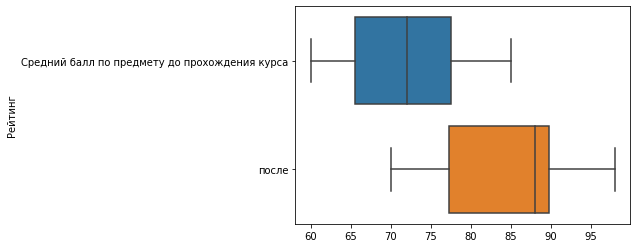

In [3]:
sns.boxplot(data=df, orient='h').set()

Написати функції:
для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def mas(massiv,n):
    sum1= 0
    for i in range(n):
        sum1+=((massiv[i])**2)
    return sum1
def Pearson(x, y):
    n = len(x)
    sum1=sum(x)
    sum2=sum(y)
    d=sum1*sum2
    k=0
    for i in range(n):
        k+=x[i]*y[i]
    sum3=mas(x,n)
    sum4=(sum(x))**2
    sum5=mas(y,n)
    sum6=((sum(y))**2)
    result=0
    r = ((n * k)-d)/(math.sqrt((n*sum3-sum4)*(n*sum5-sum6)))
    print('Значення коефіцієнту кореляції Пірсона: r = ' + str(r))
    df= len(x)-2
    print('Значення ступеня свободи: df = ' + str(df))  
    table = pd.read_excel("file:///D:\бмд\Таблиця%20критичних%20значень%20кореляційного%20аналізу.xlsx").iloc[df-1, 1 ]
    print("Критичне значення коефіцієнту кореляції = " + str(table))
    if table<r:
        result = " результат оцінки значимості зв'язку - significant"
    else:
        result = " результат оцінки значимості зв'язку -  not significant"
    return result

In [5]:
def Student(x, y):
    n=len(x)
    d=[]*n
    for i in range(n):
        d.append(x[i] - y[i])
    M=sum(d)/n
    L=0
    for i in range(n):
        L += ((M-d[i])**2)
    sigma = math.sqrt((L)/(n-1))
    t = M/(sigma/math.sqrt(n))
    print('Отримане значення t-критерію Стьюдента: t = ' + str(t))
    df = n - 1
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel("file:///D:\бмд\Таблица%20критических%20значений%20для%20парного%20критерия.xlsx").iloc[df-1, 1 ]
    print("Критичне значення коефіцієнту Стьюдента = " + str(table))
    if table<t:
        result = " результат оцінки значимості зв'язку - significant"
    else:
        result = " результат оцінки значимості зв'язку -  not significant"
    return result

Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

In [6]:
Pearson(table1, table2)

Значення коефіцієнту кореляції Пірсона: r = 0.9598289766048911
Значення ступеня свободи: df = 8
Критичне значення коефіцієнту кореляції = 0.6319


" результат оцінки значимості зв'язку - significant"

In [7]:
Student(table1,table2)

Отримане значення t-критерію Стьюдента: t = -15.010341262862287
Значення ступеня свободи: df = 9
Критичне значення коефіцієнту Стьюдента = 2.262


" результат оцінки значимості зв'язку -  not significant"

Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

#### 1.За коефіцієнтом кореляції Пірсона робимо висновок, що існує статистично значима залежность між групами.Величина цього зв'язку: "висока" так як r = 0.9598289766048911

#### 2.Оскільки temp>tcritical , приймається альтернативна гіпотеза про відмінність в середніх.